In [1]:
# importing required modules
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
%pylab inline
import os
import scipy.stats
import datetime as dt
import urllib2 as url
from zipfile import ZipFile
from StringIO import StringIO
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = url.urlopen("https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip").read()
file= ZipFile(StringIO(a))
bikedata1 = file.open("2013-07 - Citi Bike trip data.csv")
july2013 = pd.read_csv(bikedata1, parse_dates=[0], infer_datetime_format=True)
print july2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
b = url.urlopen("https://s3.amazonaws.com/tripdata/201308-citibike-tripdata.zip").read()
file= ZipFile(StringIO(b))
bikedata2 = file.open("2013-08 - Citi Bike trip data.csv")
aug2013 = pd.read_csv(bikedata2, parse_dates=[0], infer_datetime_format=True)
print aug2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [4]:
c = url.urlopen("https://s3.amazonaws.com/tripdata/201309-citibike-tripdata.zip").read()
file= ZipFile(StringIO(c))
bikedata3 = file.open("2013-09 - Citi Bike trip data.csv")
sep2013 = pd.read_csv(bikedata3, parse_dates=[0], infer_datetime_format=True)
print sep2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [5]:
CSlist = ['Washington Pl & Broadway', 'Washington Square E', 'LaGuardia Pl & W 3 St', 'Sullivan St & Washington Sq', \
         'MacDougal St & Washington Sq', 'Washington Pl & 6 Ave']
july2013a = july2013[july2013['start station name'].isin(CSlist)]
temp = pd.DatetimeIndex(july2013a['starttime'])
july2013a['startdate'] = temp.date
july2013a['starttimes'] = temp.time
del july2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
aug2013a = aug2013[aug2013['start station name'].isin(CSlist)]
temp1 = pd.DatetimeIndex(aug2013a['starttime'])
aug2013a['startdate'] = temp1.date
aug2013a['starttimes'] = temp1.time
del aug2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#aug2013a.head()

In [8]:
sep2013a = sep2013[sep2013['start station name'].isin(CSlist)]
temp2 = pd.DatetimeIndex(sep2013a['starttime'])
sep2013a['startdate'] = temp2.date
sep2013a['starttimes'] = temp2.time
del sep2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#sep2013a.head()

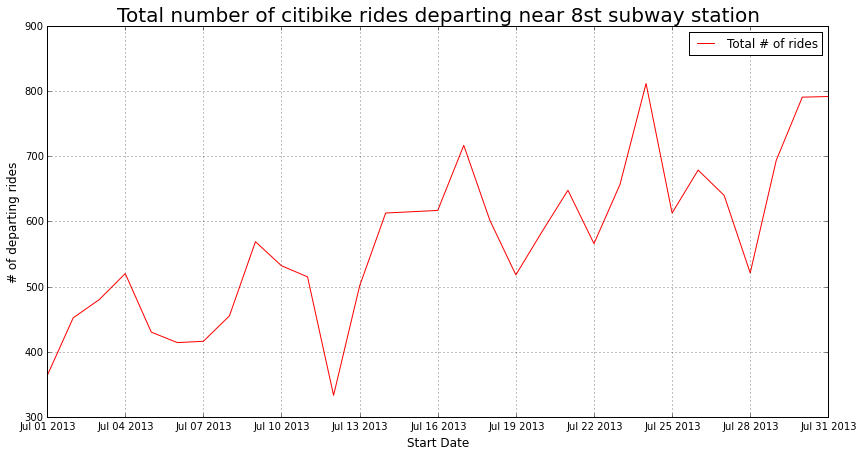

In [10]:
ax = july2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax.set_xlabel("Start Date", fontsize = 12)
ax.set_ylabel("# of departing rides", fontsize = 12)
ax.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

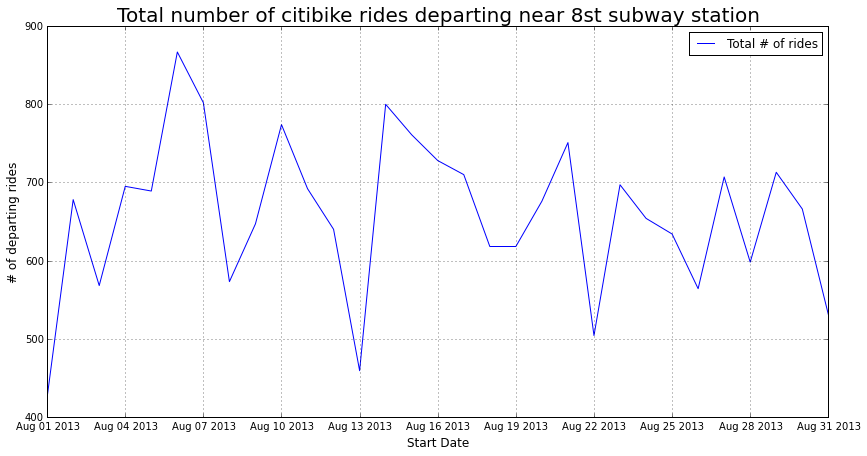

In [11]:
ax1 = aug2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='blue', \
                                                 grid=True)
ax1.set_xlabel("Start Date", fontsize = 12)
ax1.set_ylabel("# of departing rides", fontsize = 12)
ax1.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

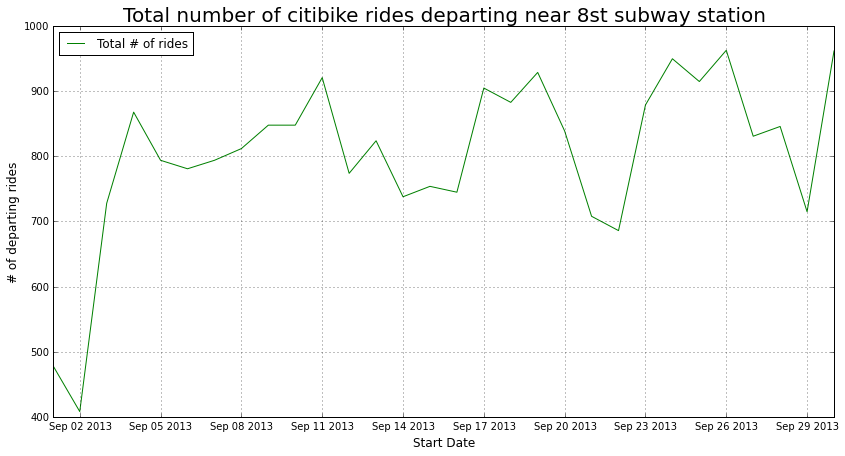

In [12]:
ax3 = sep2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='green', \
                                                 grid=True)
ax3.set_xlabel("Start Date", fontsize = 12)
ax3.set_ylabel("# of departing rides", fontsize = 12)
ax3.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

In [13]:
bikesum13 = july2013a.append([aug2013a, sep2013a])

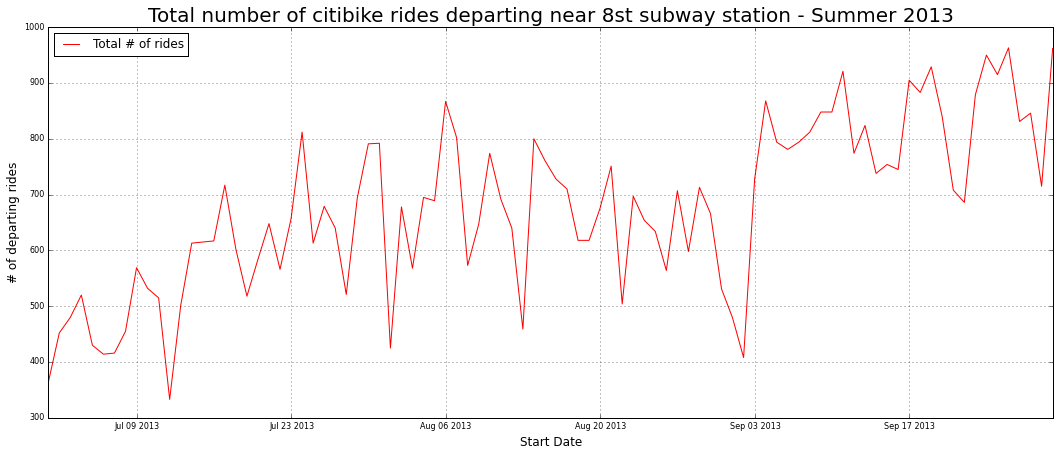

In [14]:
ax7 = bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax7.set_xlabel("Start Date", fontsize = 12)
ax7.set_ylabel("# of departing rides", fontsize = 12)
ax7.set_title("Total number of citibike rides departing near 8st subway station - Summer 2013", fontsize = 20)
ax7.tick_params(labelsize = 8)

In [15]:
bikesum13.groupby('startdate').count().tripduration.describe()

count     92.000000
mean     676.358696
std      150.641747
min      333.000000
25%      568.750000
50%      687.500000
75%      792.500000
max      963.000000
Name: tripduration, dtype: float64

In [16]:
subjul121 = pd.read_csv('turnstile_120707.txt')
subjul122 = pd.read_csv('turnstile_120714.txt')
subjul123 = pd.read_csv('turnstile_120721.txt')
subjul124 = pd.read_csv('turnstile_120728.txt')
subjul125 = pd.read_csv('turnstile_120804.txt')

subjul12 = subjul121.append([subjul122, subjul123, subjul124, subjul125])
print subjul12.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')


In [17]:
CAlist = ['A038' , 'A039']
subjul12a = subjul12[subjul12["C/A"].isin(CAlist)]
subjul12a['DATE11'] =  pd.to_datetime(subjul12a['DATE1'])
subjul12a['DATE12']= pd.DatetimeIndex(subjul12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
#subjul12a.head()

In [19]:
subjul12b = subjul12a.groupby(subjul12a.DATE12).sum()
#subjul12b.head()

In [20]:
subjul12c = subjul12b.drop(subjul12b.index[[0, -1, -2, -3]])

In [21]:
subjul12c['users'] = subjul12c.EXITS6-subjul12c.EXITS1

In [22]:
#subjul12c.users

In [23]:
subjul12c.users[subjul12c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
#subjul12c.users

In [25]:
subjul12c.users = subjul12c.users.fillna(subjul12c.users.mean())
subjul12c.users

DATE12
2012-07-01     6499.000000
2012-07-02    10534.000000
2012-07-03     6884.000000
2012-07-04     4675.000000
2012-07-05     5505.000000
2012-07-06     7446.555556
2012-07-07     6473.000000
2012-07-08     6931.000000
2012-07-09     9972.000000
2012-07-10     7779.000000
2012-07-11     3860.000000
2012-07-12    10588.000000
2012-07-13     7446.555556
2012-07-14     7176.000000
2012-07-15     6287.000000
2012-07-16     9942.000000
2012-07-17     6755.000000
2012-07-18     4847.000000
2012-07-19    10092.000000
2012-07-20     7446.555556
2012-07-21     5501.000000
2012-07-22     7034.000000
2012-07-23     9497.000000
2012-07-24     7319.000000
2012-07-25     6113.000000
2012-07-26    10565.000000
2012-07-27     7446.555556
2012-07-28     7260.000000
2012-07-29     6013.000000
2012-07-30     8270.000000
2012-07-31     8686.000000
Name: users, dtype: float64

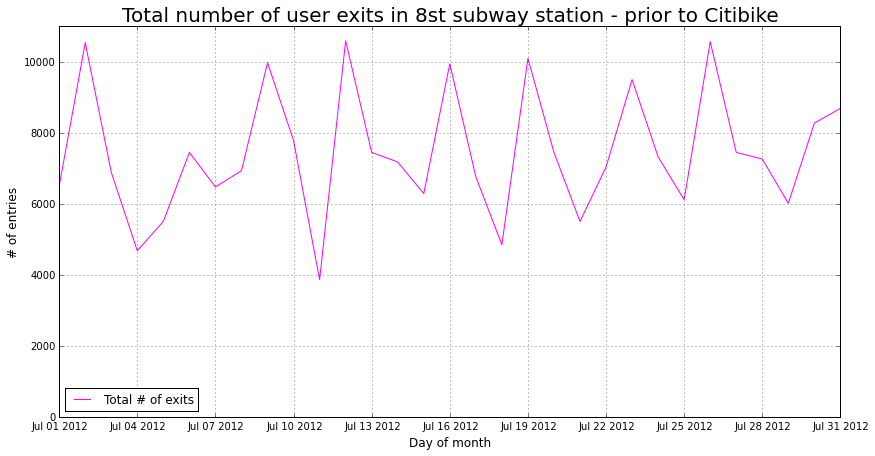

In [26]:
ax4 = subjul12c.plot(y='users', figsize=(14,7), label="Total # of exits", color='Magenta', \
                                                 grid=True, ylim = (0, 11000))
ax4.set_xlabel("Day of month", fontsize = 12)
ax4.set_ylabel("# of entries", fontsize = 12)
ax4.set_title("Total number of user exits in 8st subway station - prior to Citibike", fontsize = 20)

In [27]:
subjul12c.users.describe()

count       31.000000
mean      7446.555556
std       1811.945498
min       3860.000000
25%       6380.000000
50%       7260.000000
75%       8478.000000
max      10588.000000
Name: users, dtype: float64

In [28]:
subaug121 = pd.read_csv('turnstile_120804.txt')
subaug122 = pd.read_csv('turnstile_120811.txt')
subaug123 = pd.read_csv('turnstile_120818.txt')
subaug124 = pd.read_csv('turnstile_120825.txt')
subsep121 = pd.read_csv('turnstile_120901.txt')

In [29]:
subaug12 = subaug121.append([subaug122, subaug123, subaug124, subsep121])

In [30]:
#subaug12.head()

In [31]:
subaug12a = subaug12[subaug12["C/A"].isin(CAlist)]
subaug12a['DATE11'] =  pd.to_datetime(subaug12a.DATE1)
subaug12a['DATE12']= pd.DatetimeIndex(subaug12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
#subaug12a.head()

In [33]:
subaug12b = subaug12a.groupby(subaug12a.DATE12).sum()
subaug12b.head()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2012-07-28,22524103,19780326,22525448,19780768,22525526,19780955,22526099,19782082,22527820,19784498,22530908,19787586,22534268,19789950,22536643,19790764
2012-07-29,24039610,28333278,24039981,28334295,24040595,28334723,24041580,28335242,24043808,28337221,24046621,28339291,24048879,28340632,24049354,28341368
2012-07-30,22547694,19799975,22549234,19801652,22551658,19802942,22555972,19805454,22560866,19807175,22562882,19808245,22564367,19810805,22565447,19812760
2012-07-31,21063538,11267434,21065909,11268649,21069084,11270216,21072455,11272349,21074458,11273757,21075925,11276120,21077926,11277023,21080024,11277763
2012-08-01,26805644,22647341,26808876,22649844,26812553,22652054,26815919,22654869,26818516,22656505,26820730,22657928,26822907,22659041,26825825,22660851


In [34]:
subaug12c = subaug12b.drop(subaug12b.index[[0, 1, 2, 3]])

In [35]:
subaug12c['users'] = subaug12c.EXITS6-subaug12c.EXITS1

In [36]:
#subaug12c.users

In [37]:
subaug12c.users[subaug12c.users < 0] = np.nan
#subaug12c.users

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
subaug12c.users = subaug12c.users.fillna(subaug12c.users.mean())
subaug12c.users

DATE12
2012-08-01    10587.000000
2012-08-02     7727.000000
2012-08-03     6692.269231
2012-08-04     6676.000000
2012-08-05     6519.000000
2012-08-06     8820.000000
2012-08-07     7084.000000
2012-08-08     5674.000000
2012-08-09     9000.000000
2012-08-10     6692.269231
2012-08-11     5439.000000
2012-08-12     5039.000000
2012-08-13     8015.000000
2012-08-14     5100.000000
2012-08-15     4198.000000
2012-08-16    10527.000000
2012-08-17     6692.269231
2012-08-18     6840.000000
2012-08-19     6901.000000
2012-08-20     9705.000000
2012-08-21     6670.000000
2012-08-22     4067.000000
2012-08-23     4830.000000
2012-08-24     6692.269231
2012-08-25     2793.000000
2012-08-26     2950.000000
2012-08-27     9642.000000
2012-08-28     8743.000000
2012-08-29     6511.000000
2012-08-30     3942.000000
2012-08-31     6692.269231
Name: users, dtype: float64

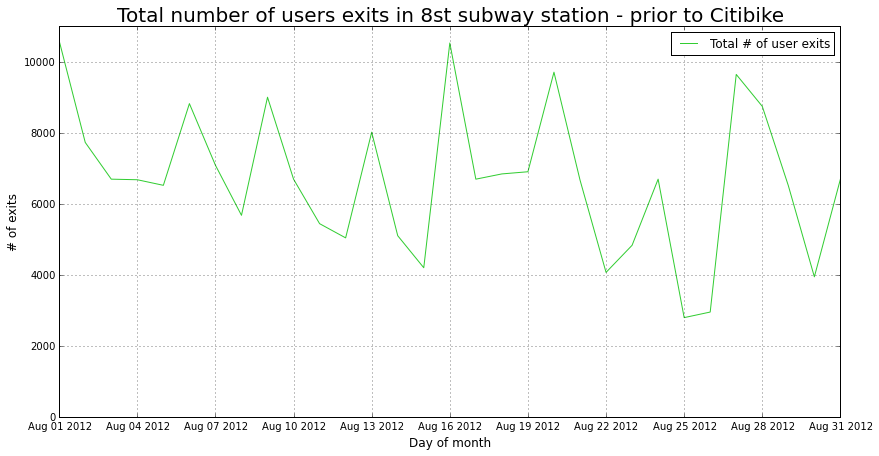

In [39]:
ax5 = subaug12c.plot(y='users', figsize=(14,7), label="Total # of user exits", color='LimeGreen', \
                                                 grid=True, ylim = (0, 11000))
ax5.set_xlabel("Day of month", fontsize = 12)
ax5.set_ylabel("# of exits", fontsize = 12)
ax5.set_title("Total number of users exits in 8st subway station - prior to Citibike", fontsize = 20)

In [40]:
subaug12c.users.describe()

count       31.000000
mean      6692.269231
std       2049.741245
min       2793.000000
25%       5269.500000
50%       6692.269231
75%       7871.000000
max      10587.000000
Name: users, dtype: float64

In [41]:
subsep122 = pd.read_csv('turnstile_120908.txt')
subsep123 = pd.read_csv('turnstile_120915.txt')
subsep124 = pd.read_csv('turnstile_120922.txt')
subsep125 = pd.read_csv('turnstile_120929.txt')
subsep126 = pd.read_csv('turnstile_121006.txt')
subsep12 = subsep121.append([subsep122, subsep123, subsep124, subsep125, subsep126])
subsep12.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [42]:
subsep12a = subsep12[subsep12["C/A"].isin(CAlist)]
subsep12a['DATE11'] =  pd.to_datetime(subsep12a.DATE1)
subsep12a['DATE12']= pd.DatetimeIndex(subsep12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [43]:
subsep12b = subsep12a.groupby(subsep12a.DATE12).sum()
#subsep12b

In [44]:
subsep12c = subsep12b.drop(subsep12b.index[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3, -4, -5]])

In [45]:
subsep12c['users'] = subsep12c.EXITS6-subsep12c.EXITS1

In [46]:
#subsep12c.users

In [47]:
subsep12c.users[subsep12c.users < 0] = np.nan
#subsep12c.users

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
subsep12c.users = subsep12c.users.fillna(subsep12c.users.mean())
subsep12c.users

DATE12
2012-09-01     1556
2012-09-02     2123
2012-09-03     6983
2012-09-04     7319
2012-09-05     5505
2012-09-06     7059
2012-09-07     6425
2012-09-08     2735
2012-09-09     3704
2012-09-10     8568
2012-09-11     9917
2012-09-12     5662
2012-09-13     6810
2012-09-14     6425
2012-09-15     3244
2012-09-16     3867
2012-09-17     9277
2012-09-18     7995
2012-09-19     7711
2012-09-20    10941
2012-09-21     6425
2012-09-22     2805
2012-09-23     3073
2012-09-24     7800
2012-09-25    11011
2012-09-26     9293
2012-09-27     6803
2012-09-28     6425
2012-09-29     8127
2012-09-30     7162
Name: users, dtype: float64

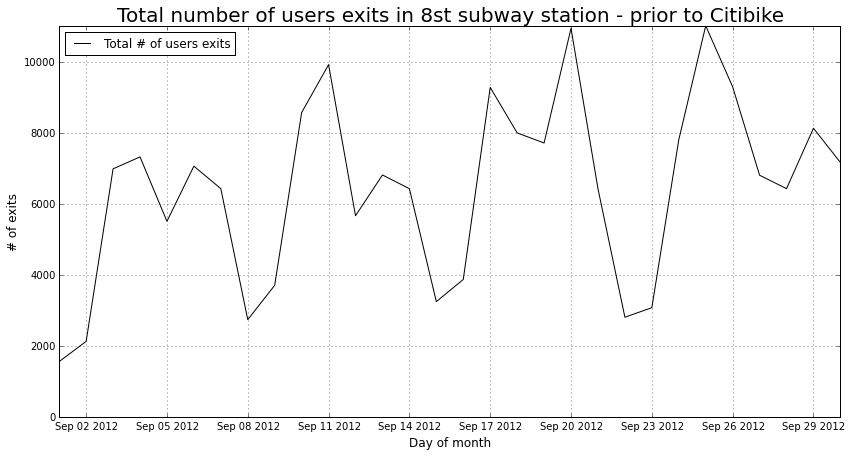

In [49]:
ax6 = subsep12c.plot(y='users', figsize=(14,7), label="Total # of users exits", color='Black', \
                                                 grid=True, ylim = (0, 11000))
ax6.set_xlabel("Day of month", fontsize = 12)
ax6.set_ylabel("# of exits", fontsize = 12)
ax6.set_title("Total number of users exits in 8st subway station - prior to Citibike", fontsize = 20)

In [50]:
subsep12c.users.describe()

count       30.000000
mean      6425.000000
std       2569.648815
min       1556.000000
25%       4276.500000
50%       6806.500000
75%       7946.250000
max      11011.000000
Name: users, dtype: float64

In [51]:
subsum12 = subjul12c.append([subaug12c, subsep12c])

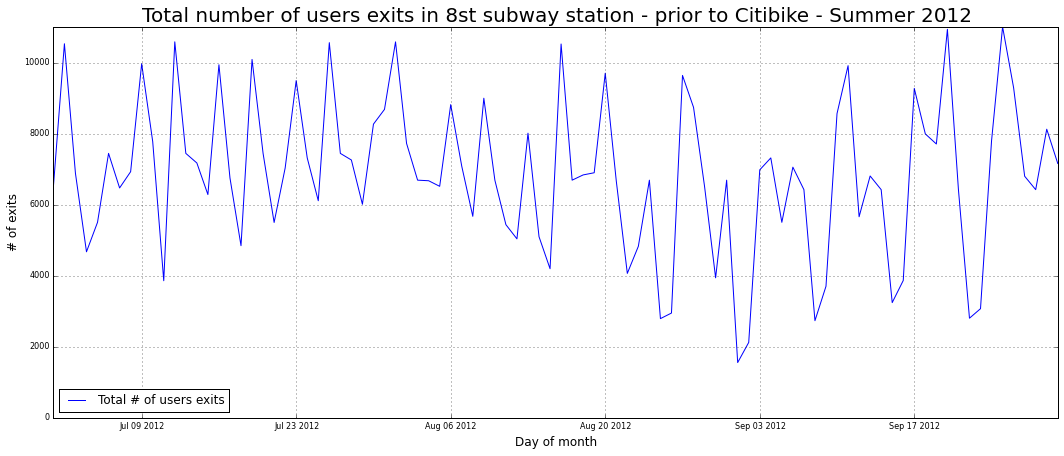

In [52]:
ax6 = subsum12.plot(y='users', figsize=(18,7), label="Total # of users exits", \
                                                 grid=True, ylim = (0, 11000))
ax6.set_xlabel("Day of month", fontsize = 12)
ax6.set_ylabel("# of exits", fontsize = 12)
ax6.set_title("Total number of users exits in 8st subway station - prior to Citibike - Summer 2012", fontsize = 20)
ax6.tick_params(labelsize = 8)

In [53]:
subsum12.users.describe()

count       92.000000
mean      6859.277917
std       2181.948015
min       1556.000000
25%       5622.750000
50%       6825.000000
75%       8043.000000
max      11011.000000
Name: users, dtype: float64

In [54]:
subsum131 = pd.read_csv('turnstile_130629.txt')
subsum132 = pd.read_csv('turnstile_130706.txt')
subsum133 = pd.read_csv('turnstile_130713.txt')
subsum134 = pd.read_csv('turnstile_130720.txt')
subsum135 = pd.read_csv('turnstile_130727.txt')
subsum136 = pd.read_csv('turnstile_130803.txt')
subsum137 = pd.read_csv('turnstile_130810.txt')
subsum138 = pd.read_csv('turnstile_130817.txt')
subsum139 = pd.read_csv('turnstile_130824.txt')
subsum1310 = pd.read_csv('turnstile_130831.txt')
subsum1311 = pd.read_csv('turnstile_130907.txt')
subsum1312 = pd.read_csv('turnstile_130914.txt')
subsum1313 = pd.read_csv('turnstile_130921.txt')
subsum1314 = pd.read_csv('turnstile_130928.txt')
subsum1315 = pd.read_csv('turnstile_131005.txt')

subsum13 = subsum131.append([subsum132, subsum133, subsum134, subsum135, subsum136, subsum137, subsum138\
                             , subsum139, subsum1310, subsum1311, subsum1312, subsum1313, subsum1314, subsum1315])
subsum13.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [55]:
subsum13a = subsum13[subsum13["C/A"].isin(CAlist)]
subsum13a['DATE11'] = pd.to_datetime(subsum13a.DATE1)
subsum13a['DATE12'] = pd.DatetimeIndex(subsum13a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
subsum13b = subsum13a.groupby(subsum13a.DATE12).sum()
subsum13b.head()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2013-06-22,125876413,23044269,125877646,23044629,125878000,23044919,125879338,23046444,125882574,23048804,125886641,23051946,125890451,23054003,125891652,23054448
2013-06-23,125891756,23054575,125892329,23055479,125894237,23057492,125897475,23059783,125900270,23061048,125901882,23061310,125902308,23061842,125903458,23063589
2013-06-24,151812431,46379934,151816726,46382736,151819961,46384553,151821758,46385406,151822806,46386102,151823497,46387305,151825158,46389546,151827879,46391967
2013-06-25,124320265,13949376,124323393,13950846,124325494,13951770,124326561,13952575,124327138,13953821,124328430,13955745,124330717,13958228,124332996,13959425
2013-06-26,116983417,17850718,116984764,17851330,116986594,17852253,116988532,17854144,116991235,17855589,116993818,17856909,116995367,17857824,116997380,17858819


In [57]:
subsum13c = subsum13b.drop(subsum13b.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, -1, -2, -3, -4]])

In [58]:
subsum13c['users'] = subsum13c.EXITS6-subsum13c.EXITS1

In [59]:
subsum13c.users

DATE12
2013-07-01        9083
2013-07-02        7149
2013-07-03        3671
2013-07-04        2988
2013-07-05   -22533951
2013-07-06        4350
2013-07-07        5509
2013-07-08        8666
2013-07-09        6353
2013-07-10        5525
2013-07-11        8038
2013-07-12   -19196059
2013-07-13        7172
2013-07-14        7119
2013-07-15        8910
2013-07-16        4958
2013-07-17        5027
2013-07-18        9983
2013-07-19   -20392539
2013-07-20        6447
2013-07-21        5538
2013-07-22        8767
2013-07-23        7419
2013-07-24        6322
2013-07-25        8534
2013-07-26         NaN
2013-07-27        6223
2013-07-28        5842
2013-07-29        9229
2013-07-30        6168
                ...   
2013-09-01        6486
2013-09-02        5938
2013-09-03        5914
2013-09-04        5543
2013-09-05        7587
2013-09-06   -17190741
2013-09-07        6974
2013-09-08        6267
2013-09-09        8973
2013-09-10        4762
2013-09-11        5606
2013-09-12       10075
2013

In [60]:
subsum13c.users[subsum13c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [61]:
subsum13c.users = subsum13c.users.fillna(subsum13c.users.mean())
subsum13c.users

DATE12
2013-07-01     9083.000000
2013-07-02     7149.000000
2013-07-03     3671.000000
2013-07-04     2988.000000
2013-07-05     6739.594937
2013-07-06     4350.000000
2013-07-07     5509.000000
2013-07-08     8666.000000
2013-07-09     6353.000000
2013-07-10     5525.000000
2013-07-11     8038.000000
2013-07-12     6739.594937
2013-07-13     7172.000000
2013-07-14     7119.000000
2013-07-15     8910.000000
2013-07-16     4958.000000
2013-07-17     5027.000000
2013-07-18     9983.000000
2013-07-19     6739.594937
2013-07-20     6447.000000
2013-07-21     5538.000000
2013-07-22     8767.000000
2013-07-23     7419.000000
2013-07-24     6322.000000
2013-07-25     8534.000000
2013-07-26     6739.594937
2013-07-27     6223.000000
2013-07-28     5842.000000
2013-07-29     9229.000000
2013-07-30     6168.000000
                  ...     
2013-09-01     6486.000000
2013-09-02     5938.000000
2013-09-03     5914.000000
2013-09-04     5543.000000
2013-09-05     7587.000000
2013-09-06     6739.5

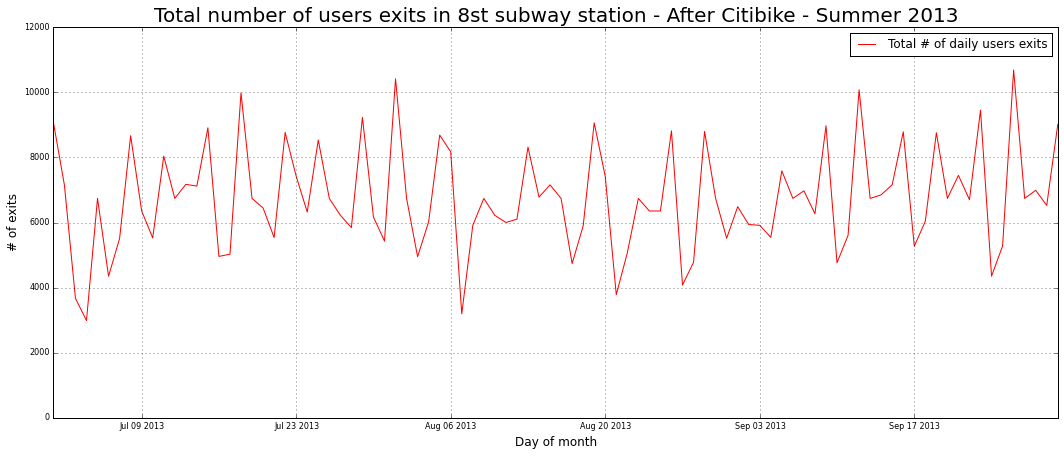

In [62]:
ax8 = subsum13c.plot(y='users', figsize=(18,7), label="Total # of daily users exits", color = 'Red', \
                                                 grid=True, ylim = (0, 12000))
ax8.set_xlabel("Day of month", fontsize = 12)
ax8.set_ylabel("# of exits", fontsize = 12)
ax8.set_title("Total number of users exits in 8st subway station - After Citibike - Summer 2013", fontsize = 20)
ax8.tick_params(labelsize = 8)

In [63]:
subsum13c.users.describe()

count       92.000000
mean      6739.594937
std       1624.792967
min       2988.000000
25%       5783.000000
50%       6739.594937
75%       7482.750000
max      10685.000000
Name: users, dtype: float64

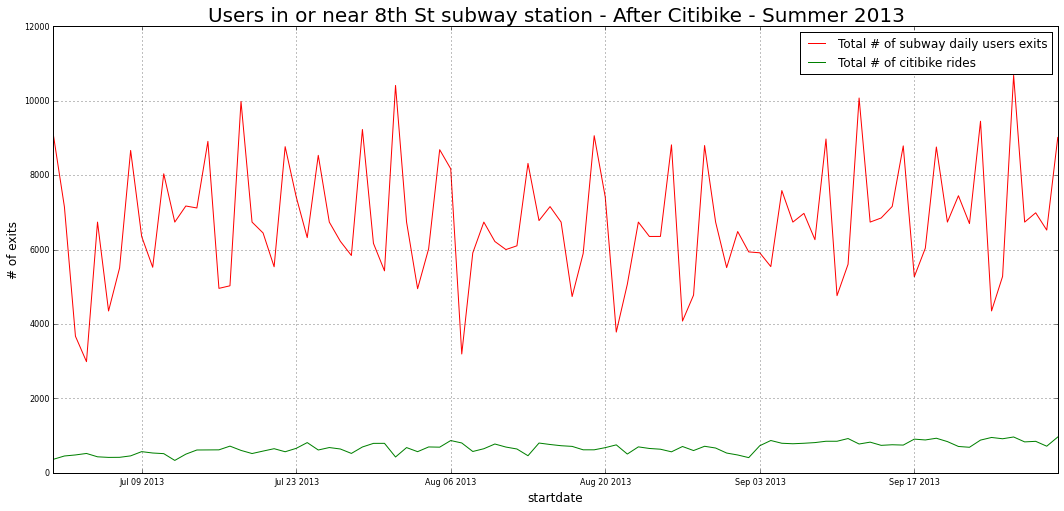

In [64]:
ax8 = subsum13c.plot(y='users', figsize=(18,8), label="Total # of subway daily users exits", color = 'Red', \
                                                 grid=True, ylim = (0, 12000))
ax8.set_xlabel("Day of month", fontsize = 12)
ax8.set_ylabel("# of exits", fontsize = 12)
ax8.set_title("Users in or near 8th St subway station - After Citibike - Summer 2013", fontsize = 20)
ax8.tick_params(labelsize = 8)
bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax8)

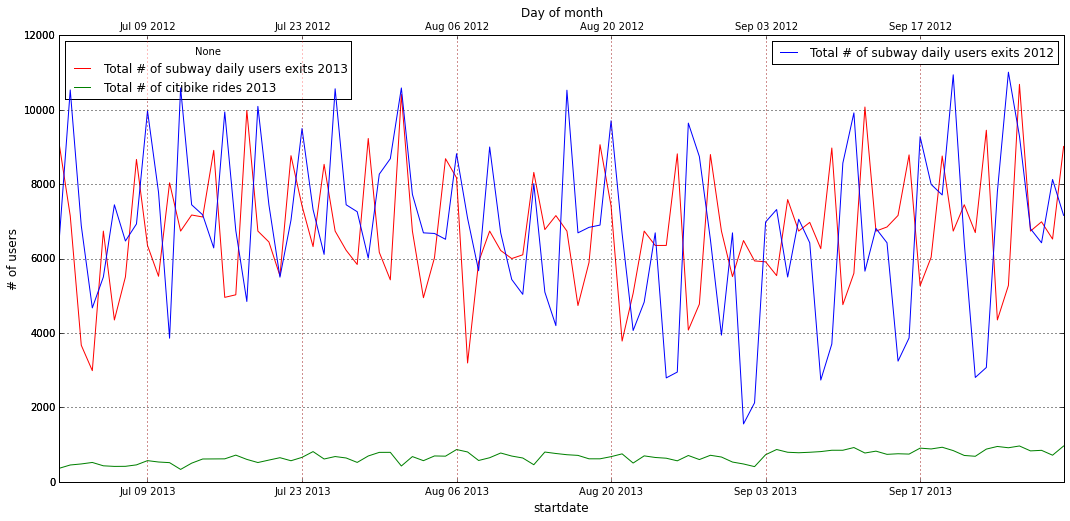

In [65]:
plt.figure(figsize=(18, 7))
ax1 = subsum13c.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users exits 2013", color = 'Red',
                              grid=True, ylim = (0, 12000))

pl.legend(ncol = 2, loc=4)

ax1.set_xlabel("Day of month", fontsize = 12)
ax1.set_ylabel("# of users", fontsize = 12)

bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides 2013",\
                                            color='green', grid=True, ax=ax1)
ax2 = ax1.twiny()
subsum12.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users exits 2012", color = 'Blue',
                       grid=True, ylim = (0, 12000))

pl.legend(ncol = 2, loc=1)

ax2.grid(color="red", axis="x")
ax2.set_xlabel("Day of month", fontsize = 12)


In [66]:
bikesum13a = bikesum13.groupby('startdate').count()

In [67]:
sum2013 = pd.concat([bikesum13a, subsum13c], axis=1)

In [68]:
sumlist = ['tripduration' , 'users']
sum2013a = sum2013[sumlist]

In [69]:
users12 = pd.DataFrame(subsum12.users)
users13 = pd.DataFrame(sum2013a.users)
users1213 = pd.concat([users12.reset_index(), users13.reset_index()], axis=1, ignore_index=True)

In [70]:
users1213 = users1213.set_index([2])

In [71]:
users1213[4] = users1213[1]-users1213[3]

In [72]:
del users1213[0]

In [73]:
sum2013b = pd.concat([sum2013a, users1213], axis=1)

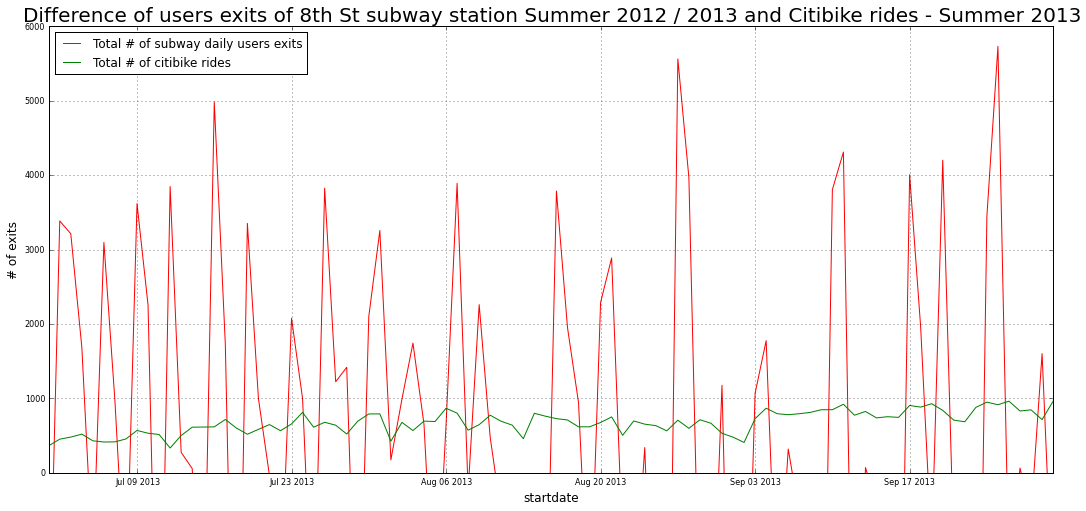

In [74]:
ax9 = users1213.plot(y=4 , figsize=(18,8), label="Total # of subway daily users exits", color = 'Red', \
                                                 grid=True, ylim = (0, 6000))
ax9.set_xlabel("Day of month", fontsize = 12)
ax9.set_ylabel("# of exits", fontsize = 12)
ax9.set_title("Difference of users exits of 8th St subway station Summer 2012 / 2013 and Citibike rides - Summer 2013", fontsize = 20)
ax9.tick_params(labelsize = 8)
bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax9)

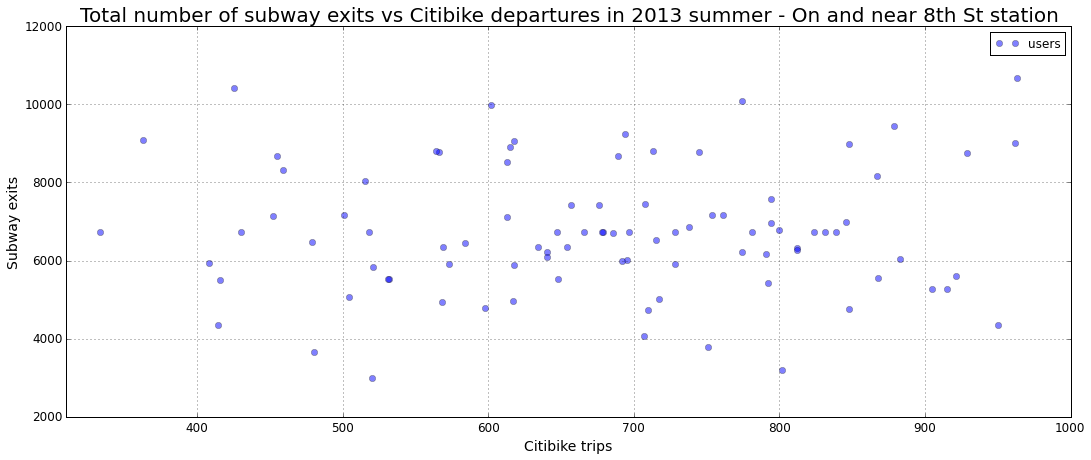

In [75]:
ax10 = sum2013a.plot(x ='tripduration', y ='users', style='o', xlim=(310 , 1000), ylim=(2000 , 12000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax10.set_xlabel("Citibike trips", fontsize = 14)
ax10.set_ylabel("Subway exits", fontsize = 14)
ax10.set_title("Total number of subway exits vs Citibike departures in 2013 summer - On and near 8th St station", fontsize = 20)

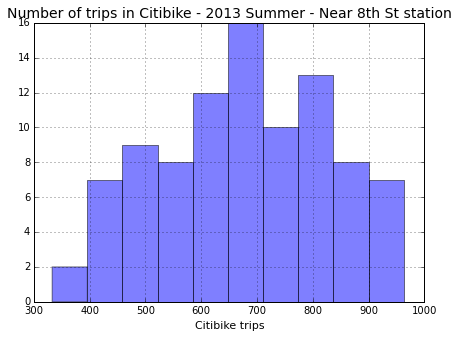

In [76]:
ax12 = sum2013a.tripduration.hist(grid=True, figsize=(7,5), alpha=0.5)
ax12.set_xlabel("Citibike trips", fontsize = 11)
ax12.set_title("Number of trips in Citibike - 2013 Summer - Near 8th St station", fontsize = 14)

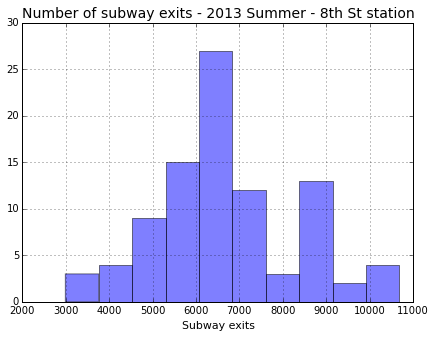

In [79]:
ax13 = sum2013a.users.hist(grid=True, figsize=(7,5), alpha=0.5)
ax13.set_xlabel("Subway exits", fontsize = 11)
ax13.set_title("Number of subway exits - 2013 Summer - 8th St station", fontsize = 14)

In [80]:
scipy.stats.pearsonr(sum2013a.users, sum2013a.tripduration)

(0.032242529461384416, 0.76028205711705743)

In [81]:
mod = smf.ols(formula='users ~ tripduration', data = sum2013a, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.09366
Date:                Mon, 16 Nov 2015   Prob (F-statistic):              0.760
Time:                        08:00:13   Log-Likelihood:                -810.16
No. Observations:                  92   AIC:                             1624.
Df Residuals:                      90   BIC:                             1629.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     6504.3833    787.199      8.263   

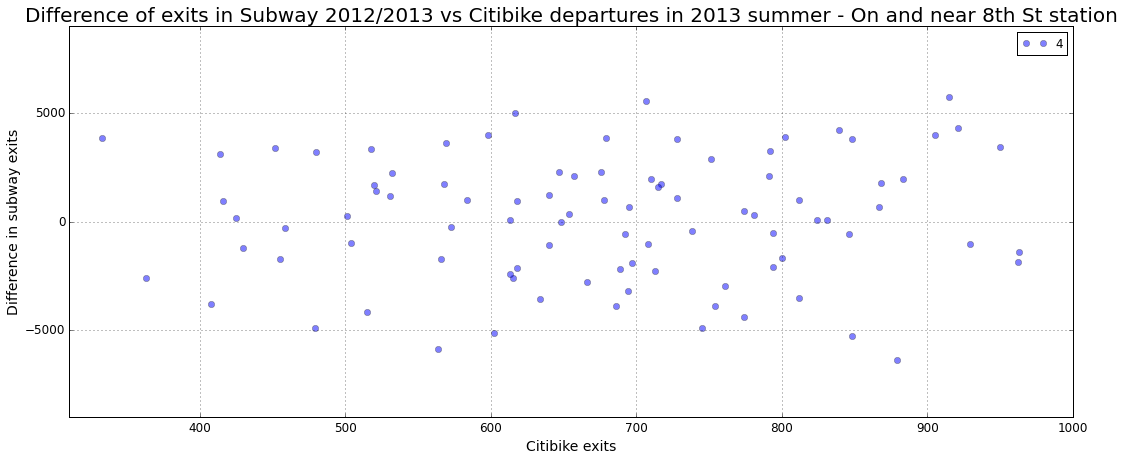

In [82]:
ax20 = sum2013b.plot(x ='tripduration', y =4, style='o', xlim=(310 , 1000), ylim=(-9000 , 9000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax20.set_xlabel("Citibike exits", fontsize = 14)
ax20.set_ylabel("Difference in subway exits", fontsize = 14)
ax20.set_title("Difference of exits in Subway 2012/2013 vs Citibike departures in 2013 summer - On and near 8th St station", fontsize = 20)

In [83]:
scipy.stats.pearsonr(sum2013b[4], sum2013a.tripduration)

(0.051388502469184777, 0.62662435740996869)

In [84]:
c = url.urlopen("https://s3.amazonaws.com/tripdata/201407-citibike-tripdata.zip").read()
file= ZipFile(StringIO(c))
bikedata4 = file.open("2014-07 - Citi Bike trip data.csv")
july2014 = pd.read_csv(bikedata4, parse_dates=[0], infer_datetime_format=True)
print july2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [85]:
d = url.urlopen("https://s3.amazonaws.com/tripdata/201408-citibike-tripdata.zip").read()
file= ZipFile(StringIO(d))
bikedata5 = file.open("2014-08 - Citi Bike trip data.csv")
aug2014 = pd.read_csv(bikedata5, parse_dates=[0], infer_datetime_format=True)
print aug2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [86]:
e = url.urlopen("https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip").read()
file= ZipFile(StringIO(e))
bikedata6 = file.open("201409-citibike-tripdata.csv")
sep2014 = pd.read_csv(bikedata6, parse_dates=[0], infer_datetime_format=True)
print sep2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [87]:
bikesum14 = july2014.append([aug2014, sep2014])

In [88]:
CSlist = ['Washington Pl & Broadway', 'Washington Square E', 'LaGuardia Pl & W 3 St', 'Sullivan St & Washington Sq', \
         'MacDougal St & Washington Sq', 'Washington Pl & 6 Ave']
bikesum14a = bikesum14[bikesum14['start station name'].isin(CSlist)]
temp4 = pd.DatetimeIndex(bikesum14a['starttime'])
bikesum14a['startdate'] = temp4.date
bikesum14a['starttimes'] = temp4.time
del bikesum14a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


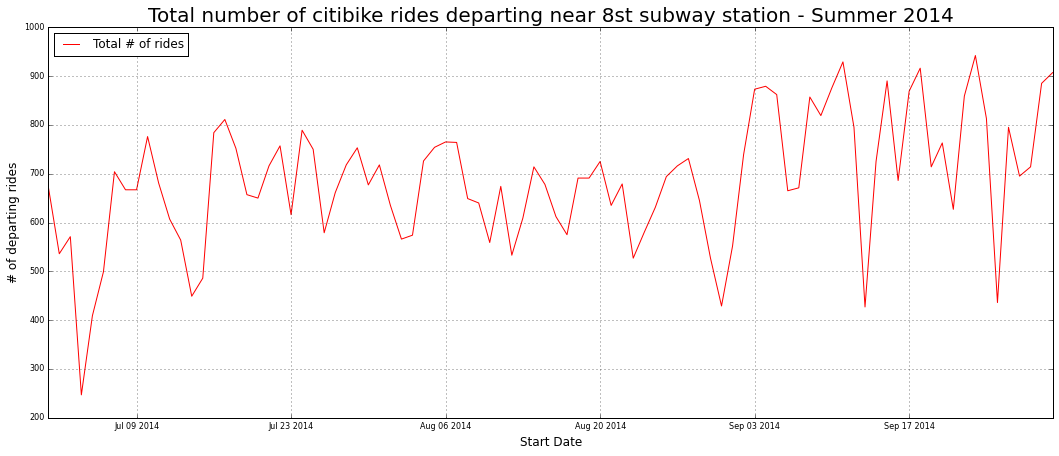

In [89]:
ax14 = bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax14.set_xlabel("Start Date", fontsize = 12)
ax14.set_ylabel("# of departing rides", fontsize = 12)
ax14.set_title("Total number of citibike rides departing near 8st subway station - Summer 2014", fontsize = 20)
ax14.tick_params(labelsize = 8)

In [90]:
bikesum14a.groupby('startdate').count().tripduration.describe()

count     92.000000
mean     685.141304
std      130.885033
min      247.000000
25%      611.250000
50%      688.500000
75%      763.250000
max      942.000000
Name: tripduration, dtype: float64

In [91]:
subsum141 = pd.read_csv('turnstile_140705.txt')
subsum142 = pd.read_csv('turnstile_140712.txt')
subsum143 = pd.read_csv('turnstile_140719.txt')
subsum144 = pd.read_csv('turnstile_140726.txt')
subsum145 = pd.read_csv('turnstile_140802.txt')
subsum146 = pd.read_csv('turnstile_140809.txt')
subsum147 = pd.read_csv('turnstile_140816.txt')
subsum148 = pd.read_csv('turnstile_140823.txt')
subsum149 = pd.read_csv('turnstile_140830.txt')
subsum1410 = pd.read_csv('turnstile_140906.txt')
subsum1411 = pd.read_csv('turnstile_140913.txt')
subsum1412 = pd.read_csv('turnstile_140920.txt')
subsum1413 = pd.read_csv('turnstile_140927.txt')
subsum1414 = pd.read_csv('turnstile_141004.txt')

subsum14 = subsum141.append([subsum142, subsum143, subsum144, subsum145, subsum146, subsum147, subsum148\
                             , subsum149, subsum1410, subsum1411, subsum1412, subsum1413, subsum1414])
subsum14.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [92]:
subsum14a = subsum14[subsum14["C/A"].isin(CAlist)]
subsum14a['DATE11'] = pd.to_datetime(subsum14a.DATE1)
subsum14a['DATE12'] = pd.DatetimeIndex(subsum14a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [93]:
subsum14b = subsum14a.groupby(subsum14a.DATE12).sum()
subsum14b.tail()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2014-09-29,132826000,28067913,132828839,28070436,132832925,28073436,132837486,28076214,132841219,28077222,132842404,28078236,132843274,28079933,132844923,28081235
2014-09-30,128456878,26103627,128460273,26105349,128462448,26106521,128464158,26107865,128466583,26109706,128469391,26110960,128471277,26111550,128473908,26112282
2014-10-01,52874063,49119231,52876828,49121107,52877632,49122776,52878244,49124722,52879446,49126049,52881940,49127652,52885449,49129887,52888794,49133105
2014-10-02,129321025,23064966,129322083,23067466,129322849,23068623,129324931,23069791,129327470,23071474,129331126,23074033,129335268,23076269,129338147,23079145
2014-10-03,128897410,15522465,128898554,15523195,123624745,12003822,123627559,12005278,122363947,11104735,5068811,2416365,1407510,283276,NaN,NaN


In [94]:
subsum14c = subsum14b.drop(subsum14b.index[[0, 1, 2, -1, -2, -3]])
subsum14c

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2014-07-01,122511207,9156745,122514638,9158031,122516581,9158611,122518706,9159245,122519949,9159704,122520921,9161045,122522513,9162407,122526007,9164822
2014-07-02,26719079,22839005,26721190,22839702,26723086,22840216,26724008,22841280,26724543,22842237,26725658,22843636,26727442,22844706,26729596,22845529
2014-07-03,332807119,25375727,332809123,25376995,332810614,25378237,332812276,25380097,332814171,25381859,332815906,25383495,332817267,25384523,332818832,25385295
2014-07-04,129015816,25958356,117379818,24337222,115656259,14492271,11108772,9654404,8725253,5521365,8725557,5521572,NaN,NaN,NaN,NaN
2014-07-05,131552256,27147403,131552993,27147686,131553037,27147744,131553316,27148241,131554438,27149483,131556790,27151496,131559575,27153518,131561636,27154690
2014-07-06,168443505,52585589,168443855,52585744,168444354,52586115,168445833,52586944,168447755,52588338,168450075,52590083,168451403,52591327,168452847,52592441
2014-07-07,131157055,27629568,131159210,27630918,131162568,27633647,131165822,27635562,131168101,27637855,131168783,27638541,131169155,27639123,131170410,27639994
2014-07-08,132865102,28103729,132868364,28106263,132871645,28108149,132874192,28110211,132875633,28111759,132877329,28112999,132880197,28114631,132883220,28117240
2014-07-09,123128001,18204630,123130600,18206860,123132276,18207898,123133421,18208445,123134978,18209542,123136708,18211578,123138282,18213380,123140088,18215682


In [95]:
subsum14c['users'] = subsum14c.EXITS6-subsum14c.EXITS1
subsum14c.users

DATE12
2014-07-01        4300
2014-07-02        4631
2014-07-03        7768
2014-07-04   -20436784
2014-07-05        4093
2014-07-06        4494
2014-07-07        8973
2014-07-08        9270
2014-07-09        6948
2014-07-10        4457
2014-07-11   -12623397
2014-07-12        6462
2014-07-13        6181
2014-07-14        8403
2014-07-15        8007
2014-07-16        2996
2014-07-17        6836
2014-07-18   -24550046
2014-07-19        6396
2014-07-20        6200
2014-07-21        4689
2014-07-22       10643
2014-07-23        7436
2014-07-24        8317
2014-07-25   -18345672
2014-07-26        4475
2014-07-27        5831
2014-07-28        8916
2014-07-29        6440
2014-07-30        5448
                ...   
2014-09-01        5855
2014-09-02        7041
2014-09-03        4075
2014-09-04        7065
2014-09-05         NaN
2014-09-06        5804
2014-09-07        6720
2014-09-08        8795
2014-09-09        6704
2014-09-10        4756
2014-09-11        8497
2014-09-12   -12764304
2014

In [96]:
subsum14c.users[subsum14c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [97]:
subsum14c.users = subsum14c.users.fillna(subsum14c.users.mean())
subsum14c.users

DATE12
2014-07-01     4300.000000
2014-07-02     4631.000000
2014-07-03     7768.000000
2014-07-04     6874.493671
2014-07-05     4093.000000
2014-07-06     4494.000000
2014-07-07     8973.000000
2014-07-08     9270.000000
2014-07-09     6948.000000
2014-07-10     4457.000000
2014-07-11     6874.493671
2014-07-12     6462.000000
2014-07-13     6181.000000
2014-07-14     8403.000000
2014-07-15     8007.000000
2014-07-16     2996.000000
2014-07-17     6836.000000
2014-07-18     6874.493671
2014-07-19     6396.000000
2014-07-20     6200.000000
2014-07-21     4689.000000
2014-07-22    10643.000000
2014-07-23     7436.000000
2014-07-24     8317.000000
2014-07-25     6874.493671
2014-07-26     4475.000000
2014-07-27     5831.000000
2014-07-28     8916.000000
2014-07-29     6440.000000
2014-07-30     5448.000000
                  ...     
2014-09-01     5855.000000
2014-09-02     7041.000000
2014-09-03     4075.000000
2014-09-04     7065.000000
2014-09-05     6874.493671
2014-09-06     5804.0

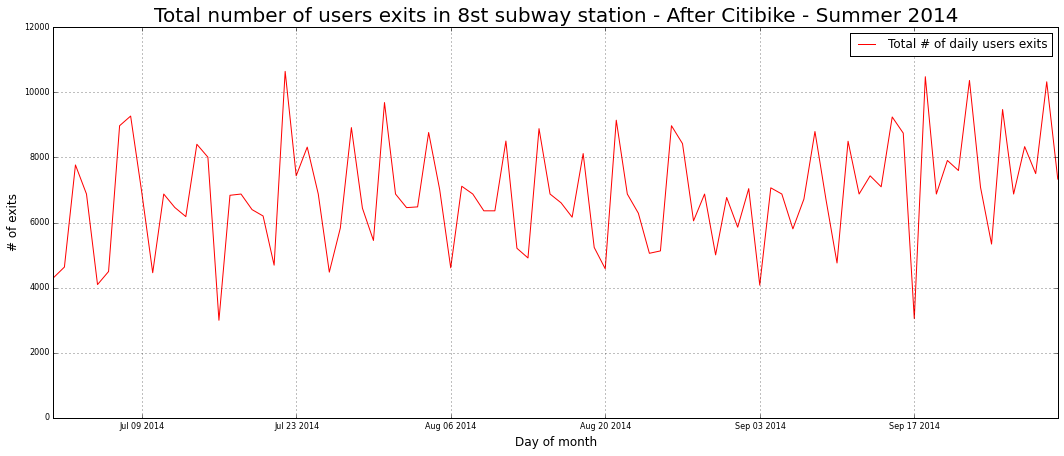

In [98]:
ax15 = subsum14c.plot(y='users', figsize=(18,7), label="Total # of daily users exits", color = 'Red', \
                                                 grid=True, ylim = (0, 12000))
ax15.set_xlabel("Day of month", fontsize = 12)
ax15.set_ylabel("# of exits", fontsize = 12)
ax15.set_title("Total number of users exits in 8st subway station - After Citibike - Summer 2014", fontsize = 20)
ax15.tick_params(labelsize = 8)

In [99]:
subsum14c.users.describe()

count       92.000000
mean      6874.493671
std       1676.897999
min       2996.000000
25%       5849.000000
50%       6874.493671
75%       8034.750000
max      10643.000000
Name: users, dtype: float64

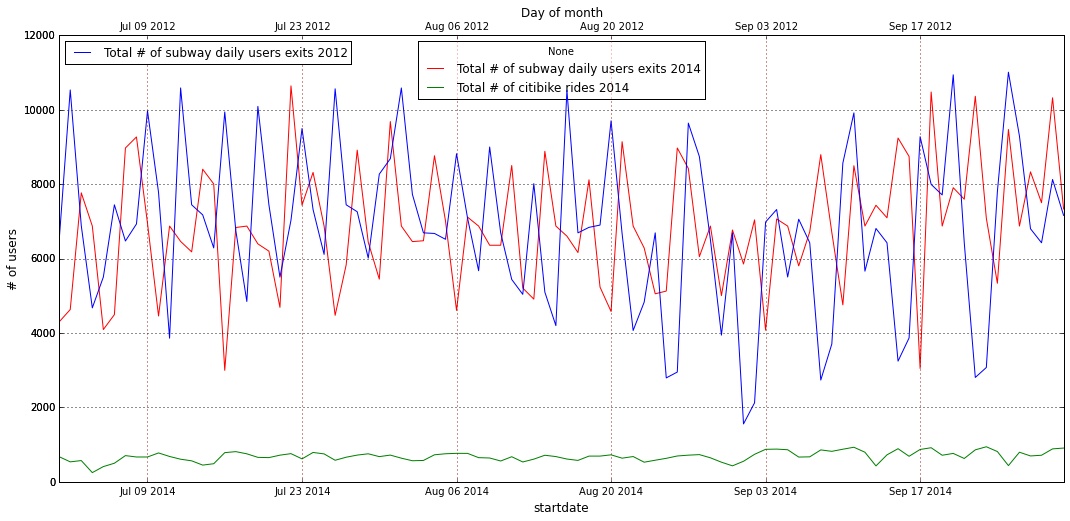

In [100]:
plt.figure(figsize=(18, 7))
ax1 = subsum14c.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users exits 2014", color = 'Red',
                              grid=True, ylim = (0, 12000))

pl.legend(ncol = 2, loc=4)

ax1.set_xlabel("Day of month", fontsize = 12)
ax1.set_ylabel("# of users", fontsize = 12)

bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides 2014",\
                                            color='green', grid=True, ax=ax1)
ax2 = ax1.twiny()
subsum12.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users exits 2012", color = 'Blue',
                       grid=True, ylim = (0, 12000))

pl.legend(ncol = 2, loc=2)

ax2.grid(color="red", axis="x")
ax2.set_xlabel("Day of month", fontsize = 12)

In [101]:
bikesum14b = bikesum14a.groupby('startdate').count()

In [102]:
sum2014 = pd.concat([bikesum14b, subsum14c], axis=1)

In [103]:
sum2014a = sum2014[sumlist]

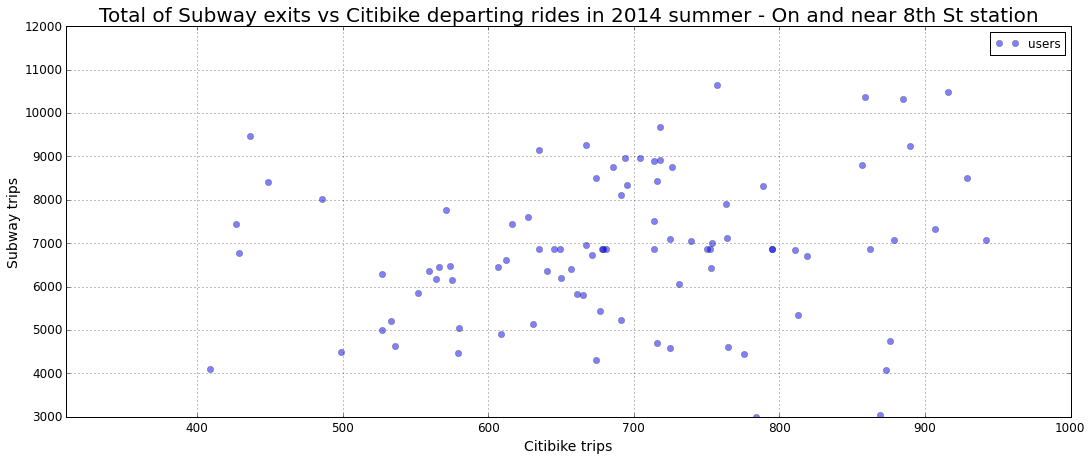

In [104]:
ax16 = sum2014a.plot(x ='tripduration', y ='users', style='o', xlim=(310 , 1000), ylim=(3000 , 12000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax16.set_xlabel("Citibike trips", fontsize = 14)
ax16.set_ylabel("Subway trips", fontsize = 14)
ax16.set_title("Total of Subway exits vs Citibike departing rides in 2014 summer - On and near 8th St station", fontsize = 20)

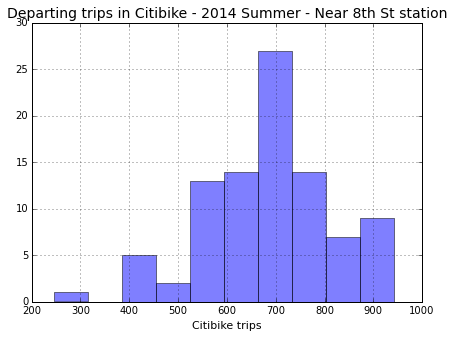

In [105]:
ax17 = sum2014a.tripduration.hist(grid=True, figsize=(7,5), alpha=0.5)
ax17.set_xlabel("Citibike trips", fontsize = 11)
ax17.set_title("Departing trips in Citibike - 2014 Summer - Near 8th St station", fontsize = 14)

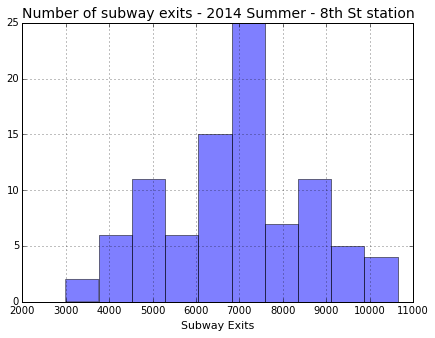

In [106]:
ax18 = sum2014a.users.hist(grid=True, figsize=(7,5), alpha=0.5)
ax18.set_xlabel("Subway Exits", fontsize = 11)
ax18.set_title("Number of subway exits - 2014 Summer - 8th St station", fontsize = 14)

In [109]:
scipy.stats.pearsonr(sum2014a.users, sum2014a.tripduration)

(0.17364874386942947, 0.097841449050976262)

In [110]:
mod = smf.ols(formula='tripduration ~ users', data = sum2014a, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:           tripduration   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.798
Date:                Thu, 12 Nov 2015   Prob (F-statistic):             0.0978
Time:                        11:57:20   Log-Likelihood:                -577.07
No. Observations:                  92   AIC:                             1158.
Df Residuals:                      90   BIC:                             1163.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    591.9671     57.316     10.328      0.0

In [111]:
users14 = pd.DataFrame(sum2014a.users)
users1214 = pd.concat([users12.reset_index(), users14.reset_index()], axis=1, ignore_index=True)

In [112]:
users1214 = users1214.set_index([2])
users1214[4] = users1214[1]-users1214[3]

In [113]:
del users1214[0]
sum2014b = pd.concat([sum2014a, users1214], axis=1)

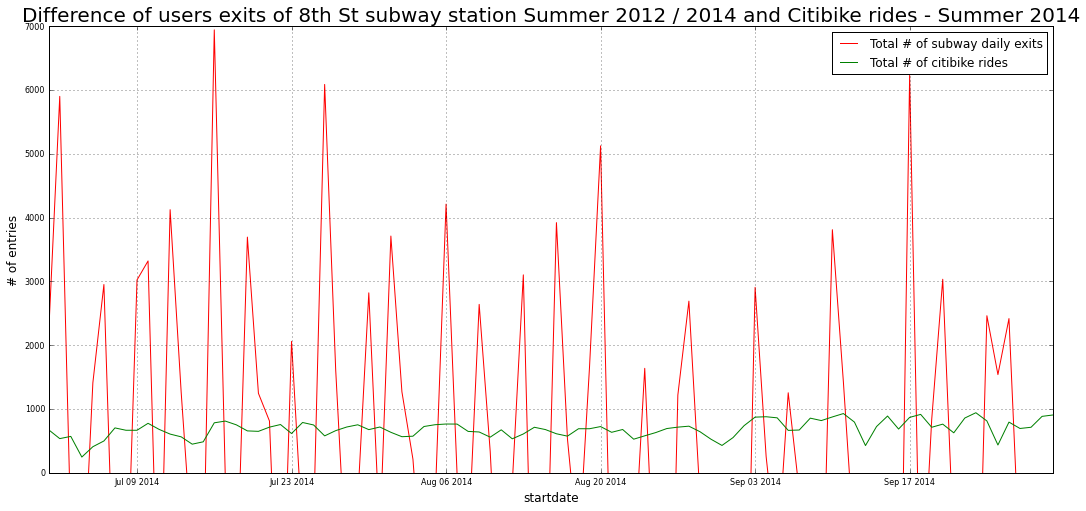

In [114]:
ax20 = users1214.plot(y=4 , figsize=(18,8), label="Total # of subway daily exits", color = 'Red', \
                                                 grid=True, ylim = (0, 7000))
ax20.set_xlabel("Day of month", fontsize = 12)
ax20.set_ylabel("# of entries", fontsize = 12)
ax20.set_title("Difference of users exits of 8th St subway station Summer 2012 / 2014 and Citibike rides - Summer 2014", fontsize = 20)
ax20.tick_params(labelsize = 8)
bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax20)

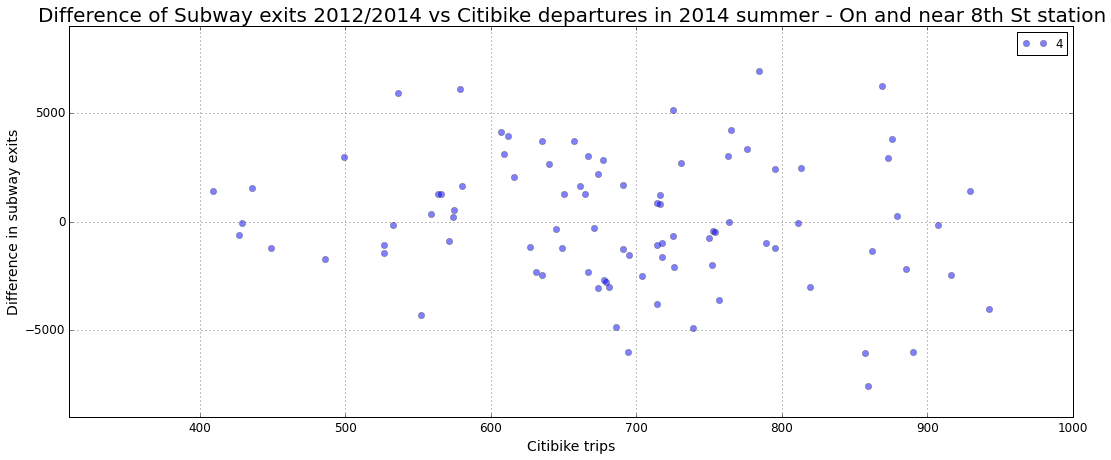

In [116]:
ax21 = sum2014b.plot(x ='tripduration', y =4, style='o', xlim=(310 , 1000), ylim=(-9000 , 9000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax21.set_xlabel("Citibike trips", fontsize = 14)
ax21.set_ylabel("Difference in subway exits", fontsize = 14)
ax21.set_title("Difference of Subway exits 2012/2014 vs Citibike departures in 2014 summer - On and near 8th St station", fontsize = 20)

In [117]:
scipy.stats.pearsonr(sum2014b[4], sum2014b.tripduration)

(-0.11639777135044536, 0.26918379182573082)

In [118]:
del sum2014b[3]

In [119]:
sum2014b.head()

,tripduration,users,1,4
startdate,,,,
2014-07-01,674,4300.000000,6499,2199.000000
2014-07-02,536,4631.000000,10534,5903.000000
2014-07-03,571,7768.000000,6884,-884.000000
2014-07-04,247,6874.493671,4675,-2199.493671
2014-07-05,409,4093.000000,5505,1412.000000


In [120]:
names = ['bikerides','users12','users14','difference']
sum2014b.columns = [names]

In [121]:
mod = smf.ols(formula='bikerides ~ difference', data = sum2014b, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              bikerides   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.236
Date:                Thu, 12 Nov 2015   Prob (F-statistic):              0.269
Time:                        11:58:30   Log-Likelihood:                -577.85
No. Observations:                  92   AIC:                             1160.
Df Residuals:                      90   BIC:                             1165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    685.0628     13.628     50.268      0.0